In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
import cartopy
import matplotlib.gridspec as gridspec
import matplotlib
import string
# matplotlib.use("TkCairo")
%matplotlib inline


In [11]:
ddir = '/home/robbie/Dropbox/dye_brine/data'

DP0_0 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='DP0_2021_12_09')

DP0_1 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='DP0_2021_12_11')

DP0_2 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='DP0_2021_12_12')

DP1_1 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='DP1_2021_12_11')

DP1_2 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='DP1_2021_12_12')

CP1_1 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='CP1_2021_12_11')

CP1_2 = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='CP1_2021_12_12')

CPL = pd.read_excel(f'{ddir}/dye_pits.ods',
                     sheet_name='CPL_2021_12_13')


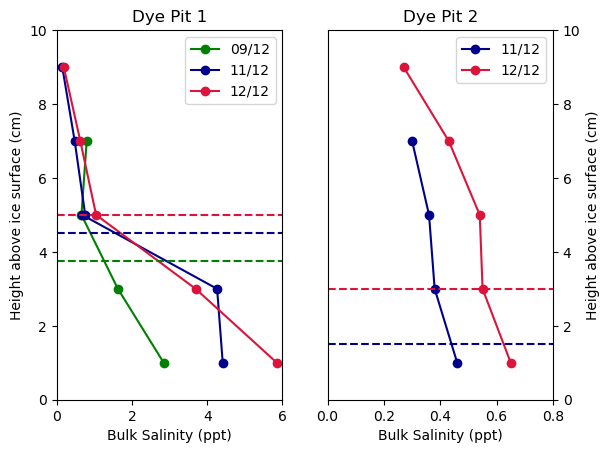

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(DP0_0['salinity'],DP0_0['slab_height'],label='09/12',color='green',marker='o')
ax1.plot(DP0_1['salinity'],DP0_1['slab_height'],label='11/12',color='darkblue',marker='o')
ax1.plot(DP0_2['salinity'],DP0_2['slab_height'],label='12/12',color='crimson',marker='o')
ax1.legend()
ax1.set_title('Dye Pit 1')

ax2.plot(DP1_1['salinity'],DP1_1['slab_height'],label='11/12',color='darkblue',marker='o')
ax2.plot(DP1_2['salinity'],DP1_2['slab_height'],label='12/12',color='crimson',marker='o')
ax2.legend()
ax2.set_title('Dye Pit 2')

### Dye Heights

ax1.axhline(3.75,color='green',ls='--') #DP0, 11th
ax1.axhline(4.5,color='darkblue',ls='--') #DP0, 11th
ax1.axhline(5,color='crimson',ls='--') #DP0, 12th

ax2.axhline(1.5,color='darkblue',ls='--') #DP1, 11th
ax2.axhline(3,color='crimson',ls='--') #DP1, 12th

################


ax1.set_ylim(0,10)
ax2.set_ylim(0,10)

ax1.set_xlim(0,6)
ax2.set_xlim(0,0.8)

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

for ax in [ax1,ax2]:
    ax.set_ylabel('Height above ice surface (cm)')
    ax.set_xlabel('Bulk Salinity (ppt)')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/field_plots.png',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/dye_brine/Paper/Figures/F8.png',dpi=500,bbox_inches='tight')

plt.show()

In [3]:
# Downloaded from:
# https://mesonet.agron.iastate.edu/request/download.phtml?network=CO_ASOS

weather = pd.read_csv('/home/robbie/Dropbox/dye_brine/data/weather/CYYQ.csv',parse_dates=['valid'])

weather['dt'] = [x.to_pydatetime() for x in weather['valid']]

weather['DOD'] = [(x - datetime.datetime(2021,12,1)).total_seconds()/(3600*24) +1for x in weather['dt']]

weather

,station,valid,tmpc,dt,DOD
0,CYYQ,2021-12-01 00:00:00,-20.0,2021-12-01 00:00:00,1.000000
1,CYYQ,2021-12-01 01:00:00,-20.0,2021-12-01 01:00:00,1.041667
2,CYYQ,2021-12-01 02:00:00,-21.0,2021-12-01 02:00:00,1.083333
3,CYYQ,2021-12-01 03:00:00,-21.0,2021-12-01 03:00:00,1.125000
4,CYYQ,2021-12-01 04:00:00,-21.0,2021-12-01 04:00:00,1.166667
...,...,...,...,...,...
828,CYYQ,2021-12-30 19:00:00,-17.0,2021-12-30 19:00:00,30.791667
829,CYYQ,2021-12-30 20:00:00,-17.0,2021-12-30 20:00:00,30.833333
830,CYYQ,2021-12-30 21:00:00,-18.0,2021-12-30 21:00:00,30.875000
831,CYYQ,2021-12-30 22:00:00,-19.0,2021-12-30 22:00:00,30.916667


In [4]:
def calc_bvf(S,T):
    
#     bvf = S * 1e-3 * ((-52.56/T)-2.28)
    
    bvf = S * 1e-3 * ((-45.917/T)+0.930)

    return bvf

def calc_equilibrium_salinity(T):
    
    S_b = T/(T-54.11)
    
    return S_b

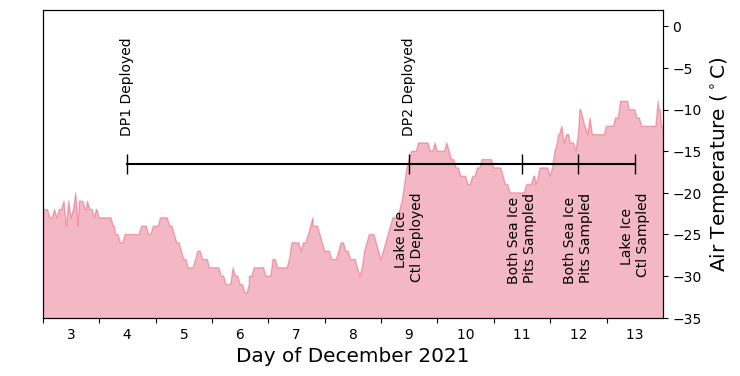

In [5]:
fig, ax3 = plt.subplots(1,1,figsize=(8,4))

dates = [4,9,11,12,13]
ones = np.zeros(len(dates))

ax3.plot(np.array(dates)+0.5,ones,marker='|',markersize=15,color='k')

ax3.set_yticks([])
ax3.set_xticks(np.arange(3, np.max(dates)+1, 1))
ax3.set_xticklabels(['             ' + str(x) for x in np.arange(3, np.max(dates)+1, 1)])
# ax3.set_xticks(np.arange(np.min(dates), np.max(dates)+1, 1)+0.5)

ax3.set_xlabel('Day of December 2021', fontsize='x-large')

ax3.annotate('DP1 Deployed',xy=(4.5,0.01),xycoords='data',va='bottom',ha='center',rotation=90)
ax3.annotate('DP2 Deployed',xy=(9.5,0.01),xycoords='data',va='bottom',ha='center',rotation=90)

ax3.annotate('Both Sea Ice \nPits Sampled',xy=(11.5,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Both Sea Ice \nPits Sampled',xy=(12.5,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax3.annotate('Lake Ice \nCtl Deployed',xy=(9.5,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Lake Ice \nCtl Sampled',xy=(13.5,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax3.patch.set_visible(False)

####

ax3b = ax3.twinx()
ax3b.set_xlim(3,14)
ax3b.fill_between(weather['DOD'], weather['tmpc'],
                 y2 = np.full(weather.shape[0], -999),
                 color='crimson',alpha=0.3)
ax3b.set_ylim(-35,2)


# ax3b.set_xticks(np.arange(np.min(dates), np.max(dates)+1, 1)+0.5)
# ax3b.set_xticklabels(np.arange(np.min(dates), np.max(dates)+1, 1))


ax3b.set_ylabel(r'Air Temperature ($^\circ$C)', fontsize='x-large')
ax3.set_zorder(ax3b.get_zorder() + 1)

plt.show()

/tmp/ipykernel_11937/3498719997.py:83: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05,hspace=0.05)


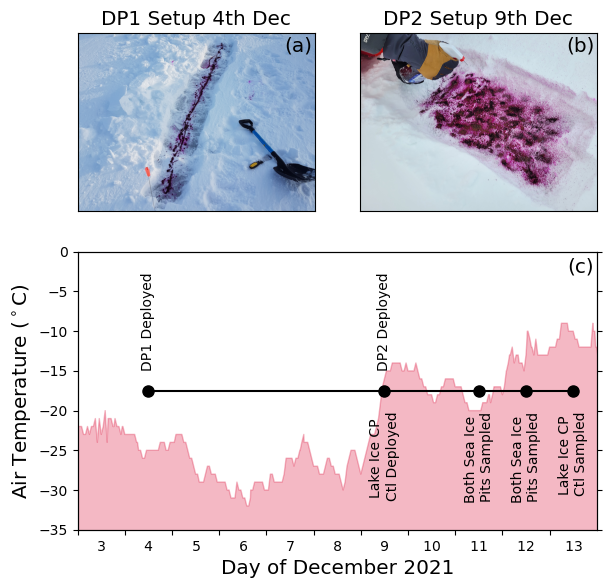

In [13]:
from PIL import Image

letters = string.ascii_lowercase

photos_dir = '../photos/field_photos'

fnames = {
          'DP1 Setup 4th Dec': f'{photos_dir}/setup/20211204_115906_DP0_crop.jpg',
          'DP2 Setup 9th Dec': f'{photos_dir}/setup/20211209_115252_DP1_JY.jpg',
         }
          

# fig, axs = plt.subplots(1,2,figsize=(8,5))

fig = plt.figure(constrained_layout=True,figsize=(6,5.8))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig,height_ratios=[1,1.2],wspace=0.05,hspace=0.0)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[0, 1])

ax3 = fig.add_subplot(spec2[1, :])

for counter, (title, fname, ax, letter) in enumerate(zip(fnames.keys(),fnames.values(),
                                                         (ax1,ax2), letters)):

    i = Image.open(fname)
    iar = np.array(i)
    
    if counter in [2]:    iar = np.flipud(iar)
    
    ax.imshow(iar)
    
    ax.set_title(title,fontsize='x-large')
    
    ax.annotate(f'({letter})', fontsize='x-large', xy=(0.99,0.98),va='top',ha='right',xycoords='axes fraction')
    
    ax.set_yticks([])
    ax.set_xticks([])
    

dates = [4,9,11,12,13]
ones = np.zeros(len(dates))


ax3.plot(np.array(dates)+0.5,ones,marker='o',markersize=8,color='k')

ax3.set_yticks([])
ax3.set_xticks(np.arange(3, np.max(dates)+1, 1))
ax3.set_xticklabels(['           ' + str(x) for x in np.arange(3, np.max(dates)+1, 1)])

ax3.set_xlabel('Day of December 2021', fontsize='x-large')

ax3.annotate('DP1 Deployed',xy=(4.5,0.008),xycoords='data',va='bottom',ha='center',rotation=90)
ax3.annotate('DP2 Deployed',xy=(9.5,0.008),xycoords='data',va='bottom',ha='center',rotation=90)

ax3.annotate('Both Sea Ice \nPits Sampled',xy=(11.5,-0.008),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Both Sea Ice \nPits Sampled',xy=(12.5,-0.008),xycoords='data',va='top',ha='center',rotation=90)

ax3.annotate('Lake Ice CP \nCtl Deployed',xy=(9.5,-0.008),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Lake Ice CP \nCtl Sampled',xy=(13.5,-0.008),xycoords='data',va='top',ha='center',rotation=90)

ax3.annotate(f'(c)', fontsize='x-large', xy=(0.995,0.98),va='top',ha='right',xycoords='axes fraction')
    
ax3.patch.set_visible(False)

####

ax3b = ax3.twinx()
ax3b.set_xlim(3,14)
ax3b.fill_between(weather['DOD'], weather['tmpc'],
                 y2 = np.full(weather.shape[0], -999),
                 color='crimson',alpha=0.3)
ax3b.set_ylim(-35,0)


ax3b.yaxis.set_ticks_position('left')
ax3b.tick_params(axis="y", which="both",right=True)
ax3b.yaxis.set_label_position("left")


ax3b.set_ylabel(r'Air Temperature ($^\circ$C)', fontsize='x-large')
ax3.set_zorder(ax3b.get_zorder() + 1)

fig.subplots_adjust(wspace=0.05,hspace=0.05)

# plt.savefig('../Paper/Figures/fieldsetup.jpg',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/fieldsetup.png',dpi=500,bbox_inches='tight')

plt.savefig('/home/robbie/Dropbox/dye_brine/Paper/Figures/F2.png',dpi=500,bbox_inches='tight')



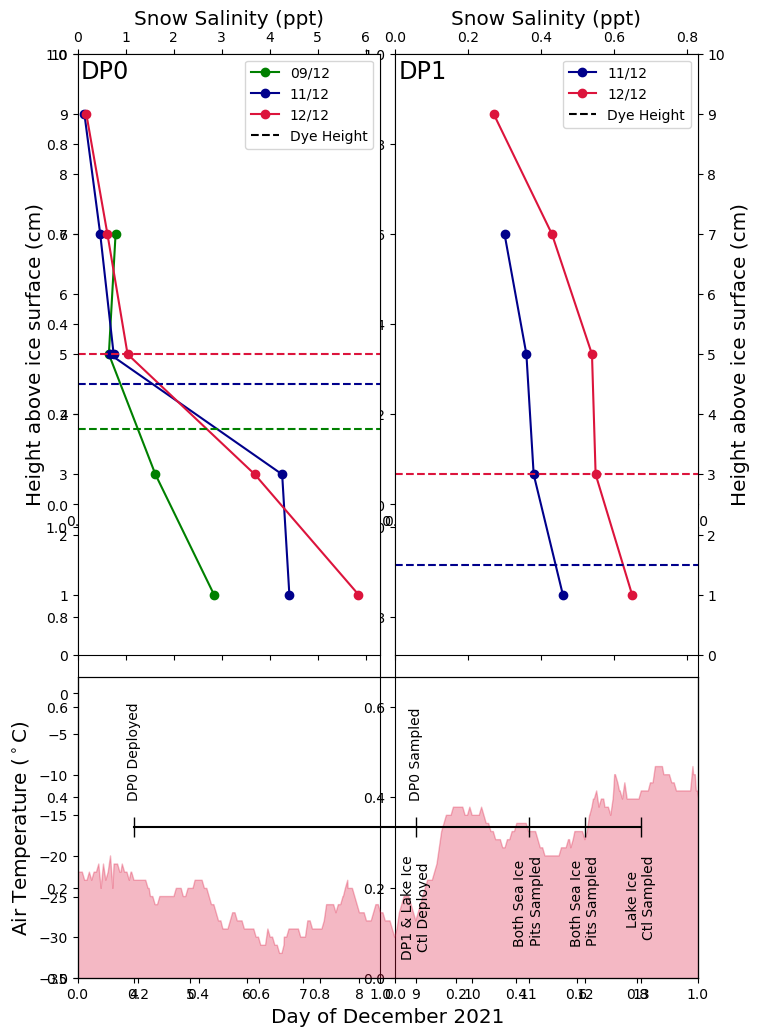

In [14]:
fig, axs = plt.subplots(2,2,figsize=(8,12))    

gs = gridspec.GridSpec(2, 2,
                   width_ratios=[1, 1],
                   height_ratios=[2, 1]
                   )

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,:])

ax1.plot(DP0_0['salinity'],DP0_0['slab_height'],label='09/12',color='green',marker='o')
ax1.plot(DP0_1['salinity'],DP0_1['slab_height'],label='11/12',color='darkblue',marker='o')
ax1.plot(DP0_2['salinity'],DP0_2['slab_height'],label='12/12',color='crimson',marker='o')

ax2.plot(DP1_1['salinity'],DP1_1['slab_height'],label='11/12',color='darkblue',marker='o')
ax2.plot(DP1_2['salinity'],DP1_2['slab_height'],label='12/12',color='crimson',marker='o')


### Dye Heights

ax1.axhline(3.75,color='green',ls='--') #DP0, 11th
ax1.axhline(4.5,color='darkblue',ls='--') #DP0, 11th
ax1.axhline(5,color='crimson',ls='--') #DP0, 12th

ax2.axhline(1.5,color='darkblue',ls='--') #DP1, 11th
ax2.axhline(3,color='crimson',ls='--') #DP1, 12th

##########################################################

ax1.set_ylim(0,10)
ax2.set_ylim(0,10)

ax1.set_xlim(0,6)
ax2.set_xlim(0,0.8)

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

for ax in [ax1,ax2]:
    ax.set_ylabel('Height above ice surface (cm)',fontsize='x-large')
    ax.set_xlabel('Snow Salinity (ppt)',fontsize='x-large')
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('both')
    ax.xaxis.set_label_position('top')
    ax.set_yticks(np.arange(0,10.1,1))
    ax.plot([],[],ls='--',color='k',label='Dye Height')
    ax.legend()
    

##########################################################
    
ax3.plot(dates,ones,marker='|',markersize=15,color='k')

ax3.set_yticks([])
ax3.set_xticks(np.arange(np.min(dates), np.max(dates)+1, 1))

ax3.set_xlabel('Day of December 2021', fontsize='x-large')

ax3.annotate('DP0 Deployed',xy=(4,0.01),xycoords='data',va='bottom',ha='center',rotation=90)
ax3.annotate('DP0 Sampled',xy=(9,0.01),xycoords='data',va='bottom',ha='center',rotation=90)

ax3.annotate('Both Sea Ice \nPits Sampled',xy=(11,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Both Sea Ice \nPits Sampled',xy=(12,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax3.annotate('DP1 & Lake Ice\nCtl Deployed',xy=(9,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax3.annotate('Lake Ice \nCtl Sampled',xy=(13,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax3.patch.set_visible(False)
ax3.set_zorder(ax3b.get_zorder() + 1)

####

ax3b = ax3.twinx()
ax3b.set_xlim(3,14)

ax3b.yaxis.tick_left()
ax3b.yaxis.set_label_position("left")

ax3b.fill_between(weather['DOD'], weather['tmpc'],
                 y2 = np.full(weather.shape[0], -999),
                 color='crimson',alpha=0.3)
ax3b.set_ylim(-35,2)


ax3b.set_ylabel(r'Air Temperature ($^\circ$C)', fontsize='x-large')

############################################


ax1.annotate('DP0',xycoords='axes fraction', fontsize='xx-large',xy=(0.01,0.99),va='top')

ax2.annotate('DP1',xycoords='axes fraction', fontsize='xx-large',xy=(0.01,0.99),va='top')

plt.subplots_adjust(wspace=0.05,hspace=0.05)

ax1.set_xlim(0,6.3)
ax2.set_xlim(0,0.83)

plt.show()

In [15]:
tiff_loc = '/home/robbie/Dropbox/dye_brine/2021-12-06-00_00_2021-12-06-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color (1).tiff'

ds = gdal.Open(tiff_loc)

data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

projection = ccrs.NorthPolarStereo()
subplot_kw = dict(projection=projection)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

DP_lon, DP_lat= -93.800885, 58.781814
LP_lat, LP_lon = 58.737605, -93.806016
km = 0.017248983733000912

NameError: name 'gdal' is not defined

In [16]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=subplot_kw)

img = ax.imshow(data[:3, :, :].
                transpose((1, 2, 0)),
                extent=extent,
                aspect='auto',
                origin='upper')


ax.scatter([DP_lon],[DP_lat],marker='x',label='Dye Pit',color='darkblue')
ax.scatter([LP_lon],[LP_lat],marker='x',label='Lake Pit',color='crimson')

ax.plot([LP_lon-0.04,LP_lon-0.04+km],[LP_lat,LP_lat],marker='|',color='k',markersize=8)

ax.annotate('1km',xy=[LP_lon-0.0355,LP_lat+0.001],xycoords='data')

ax.annotate('N',
            xy=(LP_lon-0.04,LP_lat+0.055),
            xytext=(LP_lon-0.04,LP_lat+0.045),
            arrowprops=dict(facecolor='black',
                            width=1, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords='data')

plt.legend()

plt.show()

NameError: name 'subplot_kw' is not defined

NameError: name 'ccrs' is not defined

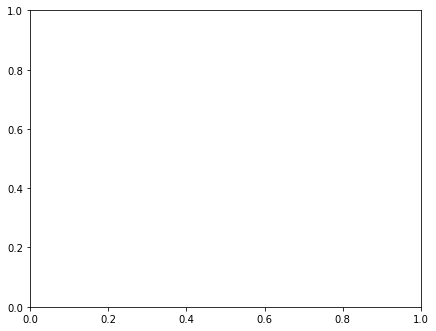

In [9]:
fig, axs = plt.subplots(2,1,figsize=(7, 12))

axs[0].remove()
ax = fig.add_subplot(2, 1, 1, projection=ccrs.NorthPolarStereo())

img = ax.imshow(data[:3, :, :].
                transpose((1, 2, 0)),
                extent=extent,
                aspect='auto',
                origin='upper')


ax.scatter([DP_lon],[DP_lat],marker='x',label='Dye Pit',color='darkblue')
ax.scatter([LP_lon],[LP_lat],marker='x',label='Lake Pit',color='crimson')

ax.plot([LP_lon-0.04,LP_lon-0.04+km],[LP_lat,LP_lat],marker='|',color='k',markersize=8)

ax.annotate('1km',xy=[LP_lon-0.0355,LP_lat+0.001],xycoords='data')

ax.annotate('N',
            xy=(LP_lon-0.04,LP_lat+0.055),
            xytext=(LP_lon-0.04,LP_lat+0.045),
            arrowprops=dict(facecolor='black',
                            width=1, headwidth=10),
            ha='center', va='center', fontsize=15,
            xycoords='data')

ax.legend()

ax = axs[1]

########################################


ax2 = ax.twinx()
ax2.set_xlim(3,14)
ax2.fill_between(weather['DOD'], weather['tmpc'],
                 y2 = np.full(weather.shape[0], -999),
                 color='crimson',alpha=0.3,zorder=-1)
ax2.set_ylim(-35,2)
ax.patch.set_visible(False)

ax.set_zorder(ax2.get_zorder() + 1)

####

ax.plot(dates,ones,marker='|',markersize=15,color='k')

ax.set_yticks([])
ax.set_xticks(np.arange(np.min(dates), np.max(dates)+1, 1))

ax.set_xlabel('Day of December 2021', fontsize='x-large')

ax.annotate('DP0 Deployed',xy=(4,0.01),xycoords='data',va='bottom',ha='center',rotation=90)
ax.annotate('DP1 Deployed',xy=(9,0.01),xycoords='data',va='bottom',ha='center',rotation=90)

ax.annotate('Both Sea Ice \nPits Sampled',xy=(11,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax.annotate('Both Sea Ice \nPits Sampled',xy=(12,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax.annotate('Lake Ice \nCtl Deployed',xy=(9,-0.01),xycoords='data',va='top',ha='center',rotation=90)
ax.annotate('Lake Ice \nCtl Sampled',xy=(13,-0.01),xycoords='data',va='top',ha='center',rotation=90)

ax2.set_ylabel(r'Air Temperature ($^\circ$C)', fontsize='x-large')

###########################################################

plt.show()